In [2]:
!pip install datasets nltk seaborn pandas matplotlib


     |████████████████████████████████| 1.5 MB 2.4 MB/s eta 0:00:01
You should consider upgrading via the '/Users/updated/venv/bin/python -m pip install --upgrade pip' command.


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mohankirushna.r/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mohankirushna.r/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Loading IMDB dataset...
Train set size: 25000
Test set size: 25000

First 5 training examples:


,text,label
0,I rented I AM CURIOUS-YELLOW from my video sto...,0
1,"""I Am Curious: Yellow"" is a risible and preten...",0
2,If only to avoid making this type of film in t...,0
3,This film was probably inspired by Godard's Ma...,0
4,"Oh, brother...after hearing about this ridicul...",0



Missing values in training set:
text     0
label    0
dtype: int64


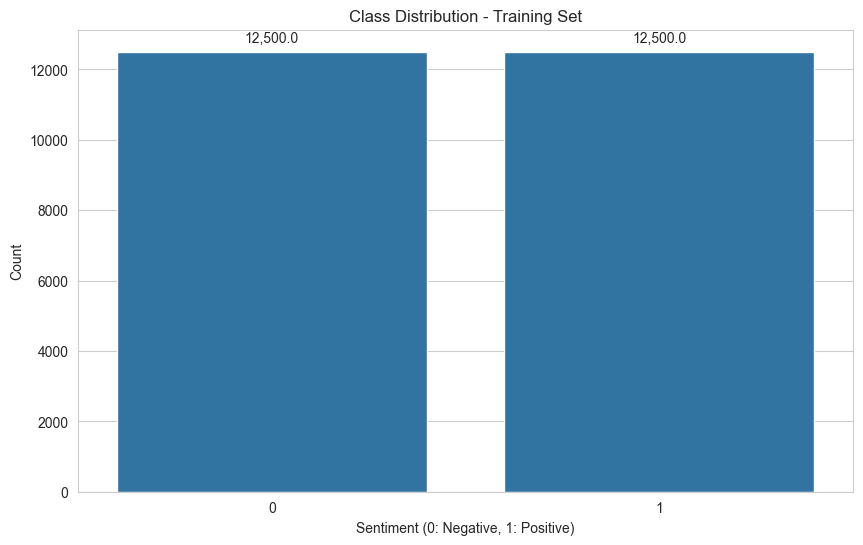

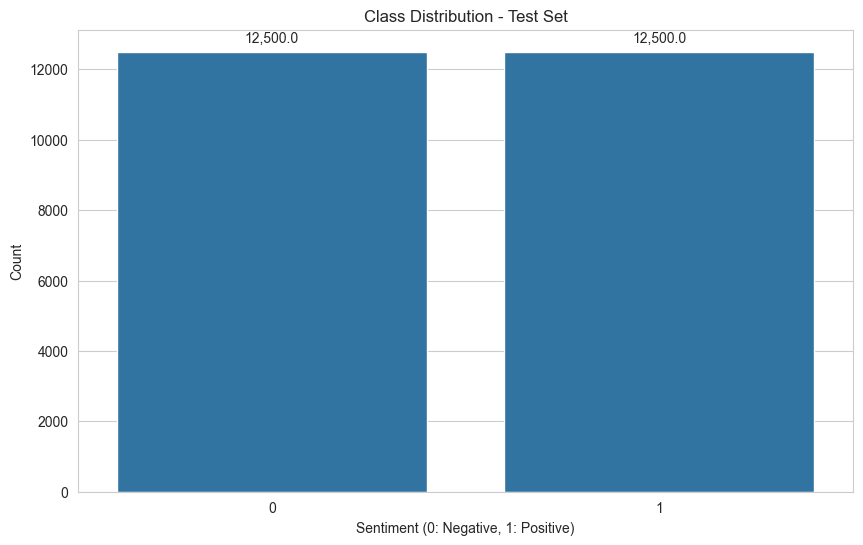

In [3]:
# IMDB Movie Review Sentiment Analysis - Data Exploration

# Import required libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset
from collections import Counter
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Set style for plots
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
%matplotlib inline

# Load the dataset
print("Loading IMDB dataset...")
dataset = load_dataset('imdb')

# Convert to pandas DataFrames
train_df = pd.DataFrame(dataset['train'])
test_df = pd.DataFrame(dataset['test'])

print(f"Train set size: {len(train_df)}")
print(f"Test set size: {len(test_df)}")

# Display basic info
print("\nFirst 5 training examples:")
display(train_df.head())

# Check for missing values
print("\nMissing values in training set:")
print(train_df.isnull().sum())

# Class distribution
def plot_class_distribution(df, title):
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(x='label', data=df)
    plt.title(f'Class Distribution - {title}')
    plt.xlabel('Sentiment (0: Negative, 1: Positive)')
    plt.ylabel('Count')
    
    for p in ax.patches:
        ax.annotate(f'{p.get_height():,}', 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha='center', va='center', 
                   xytext=(0, 10), 
                   textcoords='offset points')
    plt.show()

plot_class_distribution(train_df, 'Training Set')
plot_class_distribution(test_df, 'Test Set')